In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# stats

In [86]:
event_list = ['Skateboard', 'Civil defense siren', ' truck horn', ' fire truck (siren)', 'Bus', 'Fire engine', 'Bicycle', 'Truck', 
             'Police car (siren)', 'Car alarm', 'Motorcycle', 'Train horn', 'Train', 'Screaming', 'Ambulance (siren)', 'Car passing by', 
             'Reversing beeps', 'Car', 'Air horn']

print(len(event_list))

def read_csv(fpath):
    label_set_list = []
    unique_label_set_list = []
    instances_per_label = {}
    with open(fpath, 'r') as fh:
        for i,ligne in enumerate(fh):
            tab = ligne.rstrip().split(',')
            nb_fields = len(tab)
            if nb_fields>5:
                labels = [el.replace('"', '').replace(' truck horn', 'Air horn').replace(' fire truck (siren)', 'Fire engine') for el in tab[3:nb_fields-2] if el in event_list]
            else:
                if tab[3] in event_list:
                    labels = [tab[3].replace(' truck horn', 'Air horn').replace(' fire truck (siren)', 'Fire engine')]
#             print(nb_fields, labels)
            label_set_list.append(labels)
            if labels not in unique_label_set_list: unique_label_set_list.append(labels)
            
#             if i==10: break
    cardinality = sum([len(el) for el in label_set_list])/len(label_set_list)
    density = sum([len(el)/len(event_list) for el in label_set_list])/len(label_set_list)
    
    print("nb of instances:", len(label_set_list))
    print("cardinality: %.3f"%(cardinality))
    print("density: %.3f"%(density))
    #     print("nb of label sets:", len(set(label_set_list)))

    print("number of distinct set labels: %d"%(len(unique_label_set_list)))
    
    flatten = lambda l: [item for sublist in l for item in sublist]
    counter = Counter(flatten(label_set_list))
    print(counter)
    set_labels = set(flatten(label_set_list))
    print(len(set_labels), set_labels)
    
    nb_inst_per_label = []
    for event in event_list:
        nb_inst_per_label.append(counter[event])

    
    print("Inst/label: %.3f"%(np.mean(np.array(nb_inst_per_label))))

19


In [87]:
train_fpath='/home/pellegri/research/ecml2020/datasets/dcase2017/training_set.csv'
read_csv(train_fpath)

nb of instances: 51172
cardinality: 0.913
density: 0.048
number of distinct set labels: 38
Counter({'Car': 22268, 'Truck': 5572, 'Bus': 3527, 'Motorcycle': 3029, 'Bicycle': 1874, 'Train': 1817, 'Car passing by': 1662, 'Police car (siren)': 1542, 'Skateboard': 1499, 'Civil defense siren': 1346, 'Fire engine': 1223, 'Screaming': 634, 'Ambulance (siren)': 315, 'Car alarm': 149, 'Train horn': 94, 'Reversing beeps': 88, 'Air horn': 59})
17 {'Police car (siren)', 'Car alarm', 'Civil defense siren', 'Skateboard', 'Motorcycle', 'Train horn', 'Reversing beeps', 'Bus', 'Car', 'Fire engine', 'Train', 'Screaming', 'Ambulance (siren)', 'Bicycle', 'Car passing by', 'Air horn', 'Truck'}
Inst/label: 2457.789


In [32]:
(7*2+4)/11

1.6363636363636365

# Impact of a 

In [2]:
# influence_file_path = 'influence_de_a.csv'
influence_file_path = 'exp/dcase2017/influence_de_a_Obj_F1.csv'

dico = {}
firstLine=True
scale_param_values = []
with open(influence_file_path) as csvfile:
    for ligne in csvfile:
        tab = ligne.rstrip().split(",")
        if firstLine:
            cles = tab
            firstLine = False
        else:
            dico[float(tab[0])] = [{cles[i+1]: float(el)} for i,el in enumerate(tab[1:])]
            scale_param_values.append(float(tab[0]))
# print(dico)
# print(scale_param_values)

In [3]:
ptest = [dico[a][1]['ptest'] for a in scale_param_values]
rtest = [dico[a][2]['rtest'] for a in scale_param_values]
f1test = [dico[a][0]['f1test'] for a in scale_param_values]
peval = [dico[a][4]['peval'] for a in scale_param_values]
reval = [dico[a][5]['reval'] for a in scale_param_values]
f1eval = [dico[a][3]['f1eval'] for a in scale_param_values]

use_eval = True
if use_eval:
    prec = peval
    rec = reval
    f1 = f1eval
else:
    prec = ptest
    rec = rtest
    f1 = f1test

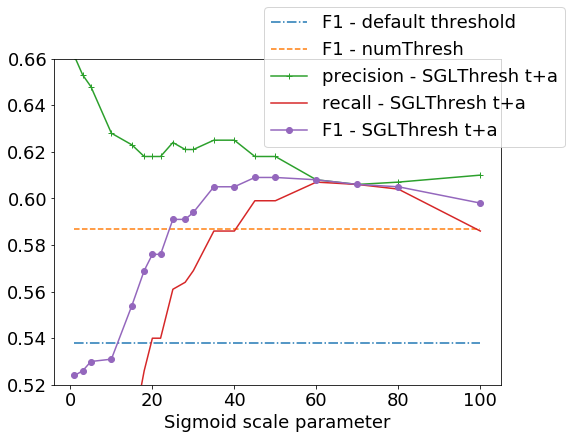

In [22]:
def plot_influence_de_a(scale_param_values, ptest, rtest, f1test, peval, reval, f1eval):
    
    dataset = 'dcase2017'
    
    fontsize=18
#     fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,8))
    plotEval = False
    learnThresholdsAndSigma=False
#     multi='LP'
#     multi='BR'

    if plotEval:
        fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))
        if learnThresholdsAndSigma:
            bname = "exp/%s/%s_CNNt_influence_sigma_objective_F1_learnThresholdsAndSigma_DEV_EVAL"%(dataset, dataset)
        else:
            bname = "exp/%s/%s_CNNt_influence_sigma_objective_F1_learnThresholdsOnly_DEV_EVAL"%(dataset, dataset)
        output_fig_path_PNG= bname + ".png"
        output_fig_path_EPS=bname + ".eps"
    else:
        fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=(8,6))
        if learnThresholdsAndSigma:
            bname = "exp/%s/%s_CNNt_influence_sigma_objective_F1_learnThresholdsAndSigma_DEV"%(dataset,dataset)
        else:
            bname = "exp/%s/%s_CNNt_influence_sigma_objective_F1_learnThresholdsOnly_DEV"%(dataset,dataset)
        output_fig_path_PNG= bname + ".png"
        output_fig_path_EPS=bname + ".eps"
        
    xlimsup=100
#     xlimsup=30
    
    ax1.plot([1, xlimsup], [0.538, 0.538], '-.', label='F1 - default threshold')
    ax1.plot([1, xlimsup], [0.587, 0.587], '--', label='F1 - numThresh')
    ax1.plot(scale_param_values, ptest, '-+', label='precision - SGLThresh t+a')
    ax1.plot(scale_param_values, rtest, label='recall - SGLThresh t+a')
    ax1.plot(scale_param_values, f1test, '-o', label='F1 - SGLThresh t+a')
    ax1.legend(fontsize=fontsize,bbox_to_anchor=(0.45, 0.7))
    ax1.tick_params(axis='x', labelsize=fontsize)
    ax1.tick_params(axis='y', labelsize=fontsize)
    ax1.set_xlabel('Sigmoid scale parameter',fontsize=fontsize)
    ax1.set_ylim([0.52, 0.66])
#     ax1.set_title("Val. subset",fontsize=14)
    if plotEval:
        ax2.plot([1, xlimsup], [0.592, 0.592], '-.', label='F1 - default threshold')
        ax2.plot([1, xlimsup], [0.604, 0.604], '--', label='F1 - numThresh')
        ax2.plot(scale_param_values, peval, '-+', label='precision - SGLThresh')
        ax2.plot(scale_param_values, reval, '-', label='recall - SGLThresh')
        ax2.plot(scale_param_values, f1eval, '-o', label='F1 - SGLThresh')
    #     ax2.legend(fontsize=fontsize)
        ax2.tick_params(axis='x', labelsize=fontsize)
        ax2.set_xlabel("Sigmoid scale parameter",fontsize=fontsize)
#         ax2.set_title("Eval. subset",fontsize=14)
#     plt.savefig(output_fig_path_PNG)
#     plt.savefig(output_fig_path_EPS)

plot_influence_de_a(scale_param_values, ptest, rtest, f1test, peval, reval, f1eval)